## Основы языка Python для аналитиков (семинары).
## Урок 4. Визуальный анализ данных.

## Задача 1:  
Постройте график.  
Назовите график.  
Сделайте именование оси x и оси y.  
Сделайте выводы.

### 1.1. Скачать данные по ссылке:  
https://gbcdn.mrgcdn.ru/uploads/asset/4266730/attachment/08ec55854637add5247d22396d0f7456.csv.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('kc_house_data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости.

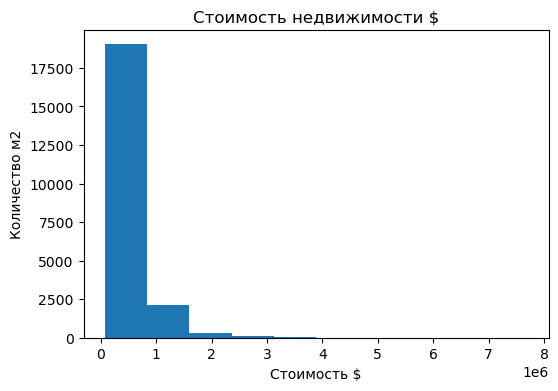

In [16]:
plt.figure(figsize = (6,4))
plt.hist(df['price'])
plt.title('Стоимость недвижимости $')
plt.xlabel('Стоимость $')
plt.ylabel('Количество м2');

**Вывод:**  
**Основное количество недвижимости стоит до 1 млн $.**

### 1.3 Изучите распределение квадратуры жилой площади.

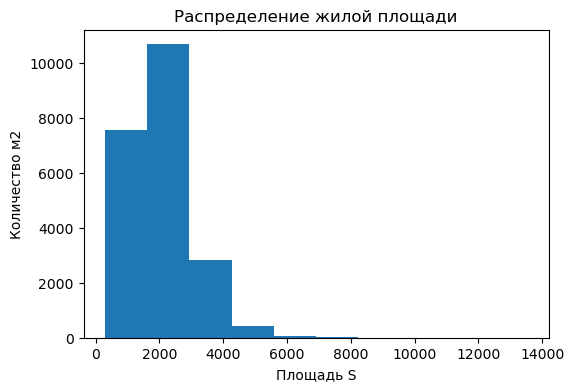

In [17]:
plt.figure(figsize = (6,4))
plt.hist(df['sqft_living'])
plt.title('Распределение жилой площади')
plt.xlabel('Площадь S')
plt.ylabel('Количество м2');

**Вывод:**  
**В основном большинстве объектов жилая площадь преобладает над общей площадью объектов.**

### 1.4 Изучите распределение года постройки.

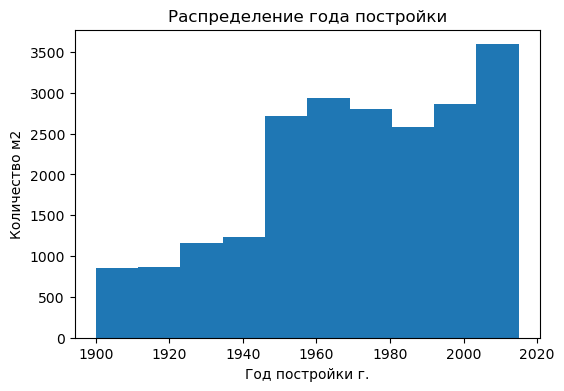

In [19]:
plt.figure(figsize = (6,4))
plt.hist(df['yr_built'])
plt.title('Распределение года постройки')
plt.xlabel('Год постройки г.')
plt.ylabel('Количество м2');

**Вывод:**  
**С 1900 г. по 2015 г. увеличилось количество м2 введенных в эксплуатацию, с 800 м2 до 3600 м2.**

## Задача 2:  
Постройте график.  
Сделайте выводы.
### 2.1 Изучите распределение домов от наличия вида на набережную.

In [9]:
data=df['waterfront'].value_counts()
data

0    21450
1      163
Name: waterfront, dtype: int64

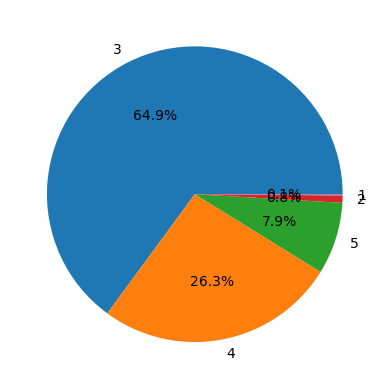

In [28]:
plt.pie(data.values, autopct='%1.1f%%', labels=data.index);

**Вывод:**  
**- Имеют вид а набережную - 163 дома (0,8%).**  
**- Не имеют вида на набережную - 21450 домов (99,2%).**

### 2.2 Изучите распределение этажей домов.

In [11]:
data=df['floors'].value_counts()
data

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

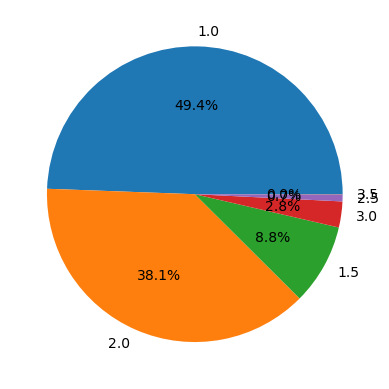

In [12]:
plt.pie(data.values, autopct='%1.1f%%', labels=data.index);

**Вывод:**  
**- Меньше всего домов в 3.5 этажей 8 объектов (0,07%).**  
**- Больше всего домов в 1 этаж 10680 объектов (49,4%).**  
**- Остальные дома в 1.5 - 3.0 этажей.**

### 2.3 Изучите распределение состояния домов.

In [13]:
data=df['condition'].value_counts()
data

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

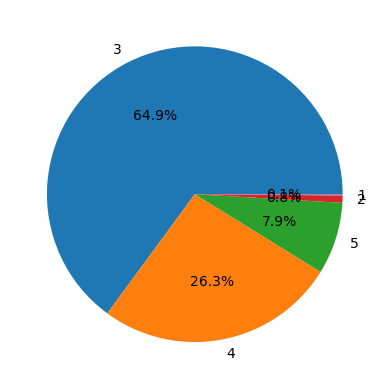

In [14]:
plt.pie(data.values, autopct='%1.1f%%', labels=data.index);

**Вывод:**  
**- Меньше всего домов в состоянии новых 30 объектов (0,07%).**  
**- Больше всего домов средний ремонт 14031 объект (64,9%).**  
**- Остальные дома с хорошим ремоном и с плохим ремонтом.**

### Задача 3:  
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.  
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

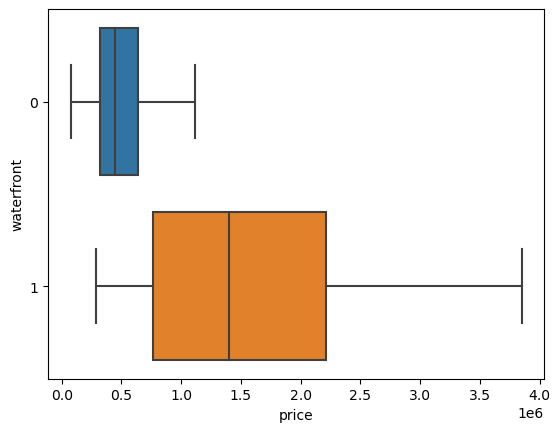

In [20]:
sns.boxplot(x=df['price'], y=df['waterfront'].astype(str), showfliers=False);

**Вывод:**  
**Стоимость недвижимости растет, если имеет вид на набережную.**

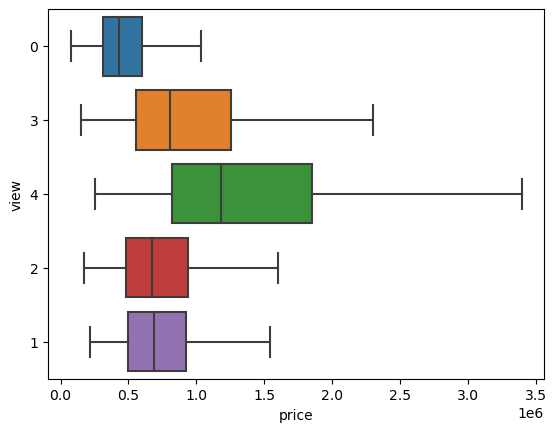

In [21]:
sns.boxplot(x=df['price'], y=df['view'].astype(str), showfliers=False);

**Вывод:**  
**Чем красивей вид из окна, тем выше растет стоимость объекта.**

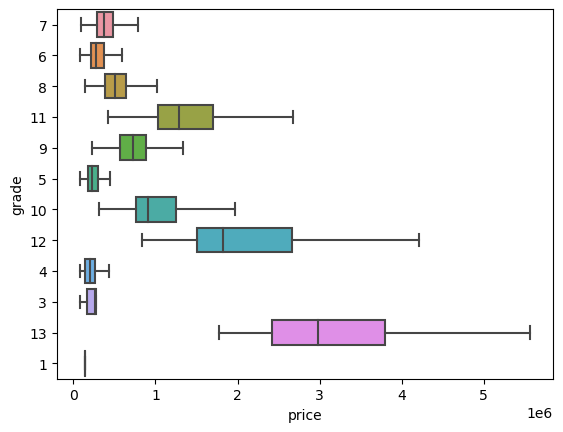

In [22]:
sns.boxplot(x=df['price'], y=df['grade'].astype(str), showfliers=False);

**Вывод:**  
**Чем выше класс дизайна и материалов, тем выше стоимость объекта.**

In [24]:
corr_matrix= df.corr()
corr_matrix=np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix)<0.3]=0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


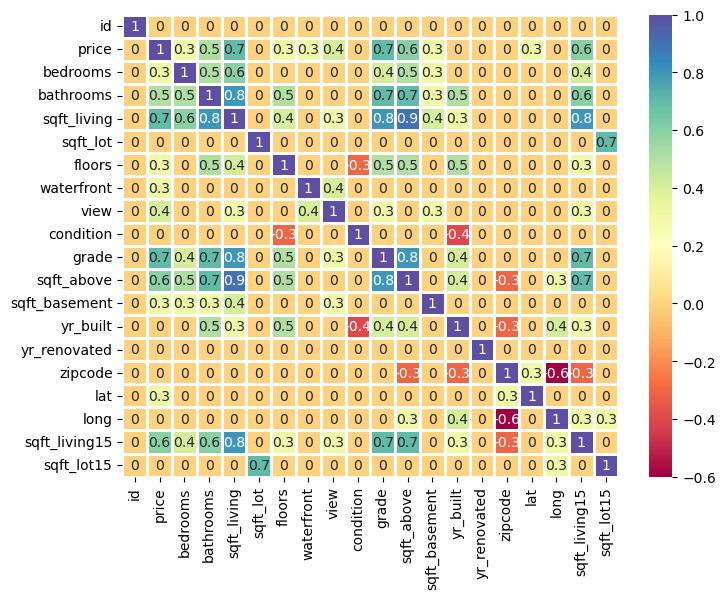

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, linewidths=1, cmap='Spectral');

**Вывод:**  
**Наибольшое влияение на стоимость оказывает:**  
**- Жилая площадь (0.7),**  
**- Материалы и дизайн (0.7),**  
**- м2 дома, которые находятся выше земли,**  
**- м2 жилой площади у 15 соседей.**